In [1]:
import os,sys
sys.path.append('../')
import camb
import hmvec as hm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create model
zs = np.linspace(0.,3.,20)
ms = np.geomspace(2e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

In [3]:
# Get Power Spectrum off of preset NFW profile
pmm_1h = hcos.get_power_1halo(name="nfw")
pmm_2h = hcos.get_power_2halo(name="nfw")

In [4]:
# Create new profile
hcos.add_battaglia_profile("electron",family="AGN",xmax=20,nxs=5000)

/global/u2/c/cpopik/hmvec/Notebooks/../hmvec/fft.py:90: RuntimeWarning: invalid value encountered in true_divide
  uk = ukts/kts[None,None,:]/mnorm[...,None]


In [5]:
# Get Power Spectrum off of new profile
pee_1h = hcos.get_power_1halo(name="electron")
pee_2h = hcos.get_power_2halo(name="electron")

In [6]:
# Calculate cross spectrum between profiles
pme_1h = hcos.get_power_1halo("nfw","electron")
pme_2h = hcos.get_power_2halo("nfw","electron")

In [7]:
# Add Halo Occupancy Distribution
hcos.add_hod(name="g",mthresh=10**10.5+zs*0.)

/global/u2/c/cpopik/hmvec/Notebooks/../hmvec/hmvec.py:876: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


The above part of the code has a problem in lines 463/464 where it references Msat_override in its definition. This is fixed(?) by making those definitions equals to None. It's unclear if this part should be set to another defintion or handled better.

/global/u2/c/cpopik/hmvec/Notebooks/../hmvec/cosmology.py:393: RuntimeWarning: invalid value encountered in true_divide
  prefactor = hzs * Wz1s * Wz2s   / chis**2.
/global/u2/c/cpopik/hmvec/Notebooks/../hmvec/cosmology.py:401: RuntimeWarning: divide by zero encountered in true_divide
  kevals = (ell+0.5)/chis


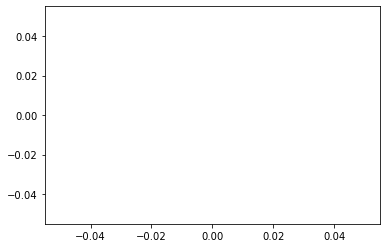

In [8]:
pmm_1h = hcos.get_power_1halo(name="nfw")
pmm_2h = hcos.get_power_2halo(name="nfw")
Pmm = pmm_1h + pmm_2h

ells = np.linspace(100,600,10)
Cls = hcos.C_kk(ells,zs,ks,Pmm,lzs1=2.5,lzs2=2.5)

plt.plot(ells, Cls)

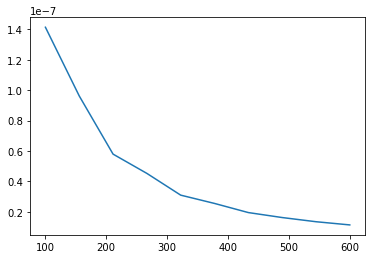

In [9]:
pgm_1h = hcos.get_power_1halo("nfw","electron")
pgm_2h = hcos.get_power_2halo("nfw","electron")
Pgm = pgm_1h + pgm_2h

ells = np.linspace(100,600,10)
Cls = hcos.C_kg(ells,zs,ks,Pgm,gzs=0.8,lzs=2.5)

plt.plot(ells, Cls)